<a href="https://colab.research.google.com/github/Hassan-DS507/data-science-notebooks/blob/main/task2_for_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Data Analysis Plan for Tom Clinic Dataset

This notebook summarizes the steps for analyzing the cleaned sales dataset. We will explore the data, visualize trends, and highlight key business insights.



##  Step 1: Import Necessary Libraries

In [61]:

# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

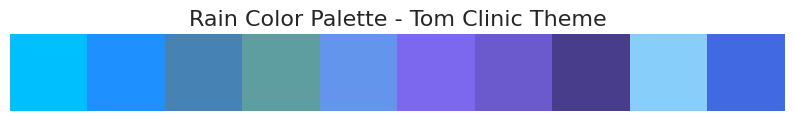

In [62]:
#  Suppress Warnings
warnings.filterwarnings("ignore")

#  Define Color Palette (Rain Vibe)
rain_colors = [
    "#00BFFF", "#1E90FF", "#4682B4", "#5F9EA0", "#6495ED",
    "#7B68EE", "#6A5ACD", "#483D8B", "#87CEFA", "#4169E1"
]

#  Set Color Palette and Style
sns.set_palette(sns.color_palette(rain_colors))
sns.set_style("whitegrid")         # Light grid background
sns.set_context("talk")            # Larger fonts for presentations

#  General Plot Settings
plt.rcParams['figure.figsize']     = (12, 6)    # Default figure size
plt.rcParams['axes.titlesize']     = 18         # Title size
plt.rcParams['axes.labelsize']     = 14         # Axis label size
plt.rcParams['xtick.labelsize']    = 12         # X-axis tick size
plt.rcParams['ytick.labelsize']    = 12         # Y-axis tick size
plt.rcParams['legend.fontsize']    = 12         # Legend font size
plt.rcParams['figure.dpi']         = 100        # Resolution

#  Pandas Display Settings
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 100)

#  Show palette preview
sns.palplot(sns.color_palette(rain_colors))
plt.title("Rain Color Palette - Tom Clinic Theme", fontsize=16)
plt.axis('off')
plt.show()


# Step 2: Load the Datasetet
We load the dataset and take an initial look at its structure.

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df = pd.read_csv('/content/drive/MyDrive/tasks_to_dataset/cleaned_data.csv')
df.head()

,Invoice_ID,Date,Customer_Name,Product,Brand,Quantity,Unit_Price,Branch,Payment_Method,Total_Price
0,PET-7000,2025-01-26,Salma,Pet Shampoo,Royal Canin,1,120,Alexandria,Visa,120
1,PET-7001,2025-02-20,Unknown,Pet Carrier,Hill's,3,350,6th October,Mobile Wallet,1050
2,PET-7002,2024-06-22,Salma,Canned Pet Food,Royal Canin,1,70,Cairo,Visa,70
3,PET-7003,2025-04-12,Salma,Pet Carrier,Purina,3,400,Port Said,Cash,1200
4,PET-7004,2024-12-26,Reem,Scratching Post,Purina,2,250,6th October,Mobile Wallet,500


## 1.  Exploratory Data Analysis (EDA)
**Goal:** Understand the structure and quality of the data.

- Check the number of rows, columns, and data types.
- Look for missing or unusual values.
- Display sample rows from the dataset.
- Generate summary statistics (mean, median, min, max).
- Analyze distributions of:
  - Quantity
  - Unit Price
  - Total Price
- Count unique values in key columns:
  - Products
  - Branches
  - Payment Methods

In [65]:
df.sample(5)

,Invoice_ID,Date,Customer_Name,Product,Brand,Quantity,Unit_Price,Branch,Payment_Method,Total_Price
2468,PET-9468,2024-02-01,Unknown,Pet Bed,Hill's,3,400,6th October,Cash,1200
1708,PET-8708,2024-05-03,Reem,Pet Carrier,Hill's,3,300,Cairo,Mobile Wallet,900
167,PET-7167,2024-04-10,Mahmoud,Pet Carrier,Royal Canin,2,400,Alexandria,Cash,800
1835,PET-8835,2024-10-26,Tarek,Pet Bed,Friskies,1,600,Cairo,Installments,600
2337,PET-9337,2024-02-08,Tarek,Chew Toy,Purina,3,70,Port Said,Cash,210


In [66]:
df['Date']

,Date
0,2025-01-26
1,2025-02-20
2,2024-06-22
3,2025-04-12
4,2024-12-26
...,...
2595,2024-04-19
2596,2024-11-29
2597,2024-04-14
2598,2024-12-26


##Extracting Day, Month, and Year from a Date Column
To engineer useful time-based features from a Date column, you can extract the day, month, and year components.


In [67]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Extract day, month, and year into separate columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [68]:
df.columns

Index(['Invoice_ID', 'Date', 'Customer_Name', 'Product', 'Brand', 'Quantity',
       'Unit_Price', 'Branch', 'Payment_Method', 'Total_Price', 'Day', 'Month',
       'Year'],
      dtype='object')

In [69]:
df.drop(columns='Date',inplace=True)

In [70]:
df

,Invoice_ID,Customer_Name,Product,Brand,Quantity,Unit_Price,Branch,Payment_Method,Total_Price,Day,Month,Year
0,PET-7000,Salma,Pet Shampoo,Royal Canin,1,120,Alexandria,Visa,120,26,1,2025
1,PET-7001,Unknown,Pet Carrier,Hill's,3,350,6th October,Mobile Wallet,1050,20,2,2025
2,PET-7002,Salma,Canned Pet Food,Royal Canin,1,70,Cairo,Visa,70,22,6,2024
3,PET-7003,Salma,Pet Carrier,Purina,3,400,Port Said,Cash,1200,12,4,2025
4,PET-7004,Reem,Scratching Post,Purina,2,250,6th October,Mobile Wallet,500,26,12,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
2595,PET-9595,Salma,Cat Litter,Whiskas,3,90,6th October,Cash,270,19,4,2024
2596,PET-9596,Nour,Canned Pet Food,Purina,3,70,Cairo,Mobile Wallet,210,29,11,2024
2597,PET-9597,Unknown,Canned Pet Food,Pedigree,3,70,Port Said,Mobile Wallet,210,14,4,2024
2598,PET-9598,Nour,Pet Carrier,Purina,1,300,6th October,Visa,300,26,12,2024


In [71]:
df.isna().sum()

,0
Invoice_ID,0
Customer_Name,0
Product,0
Brand,0
Quantity,0
Unit_Price,0
Branch,0
Payment_Method,0
Total_Price,0
Day,0


## Date Column Processed and Ready

We converted the `Date` column to proper datetime format.

Then we created three new columns:

- `Day` – day of the month  
- `Month` – month number  
- `Year` – full year
-Delete `Date` columns
-All values were checked and there are no errors or missing dates.
- The data is clean and ready for **analysis**.

## Generate summary statistics (mean, median, min, max).

In [72]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,"2,600.00",2.03,0.81,1.00,1.00,2.00,3.00,3.00
Unit_Price,"2,600.00",222.32,148.21,50.00,80.00,200.00,350.00,600.00
Total_Price,"2,600.00",451.14,378.55,50.00,180.00,300.00,700.00,"1,800.00"
Day,"2,600.00",15.82,8.94,1.00,8.00,16.00,24.00,31.00
Month,"2,600.00",5.49,3.49,1.00,2.00,5.00,8.00,12.00
Year,"2,600.00","2,024.24",0.43,"2,024.00","2,024.00","2,024.00","2,024.00","2,025.00"


## Observation

Most of your customers walk in, buy exactly what they need, and walk out. They usually take 1–2 items per visit — not because they’re spending little, but because your products are focused and high-value.

Prices vary a lot — from basic products around 50 EGP to premium ones up to 600 EGP. That’s not random — it means you’re selling to **different customer levels**, and you can start thinking in terms of **segments**:
- customers who come for essentials,
- and others who don’t mind paying more for premium.

On the surface, the average sale looks high. But the real story? Most of your revenue is coming from **repeat, mid-range buyers**. The high numbers are driven by a small group, not the majority. So if you want stable growth, **focus on the middle — they’re your backbone**.



##Count unique values in key columns

In [73]:
df.columns

Index(['Invoice_ID', 'Customer_Name', 'Product', 'Brand', 'Quantity',
       'Unit_Price', 'Branch', 'Payment_Method', 'Total_Price', 'Day', 'Month',
       'Year'],
      dtype='object')

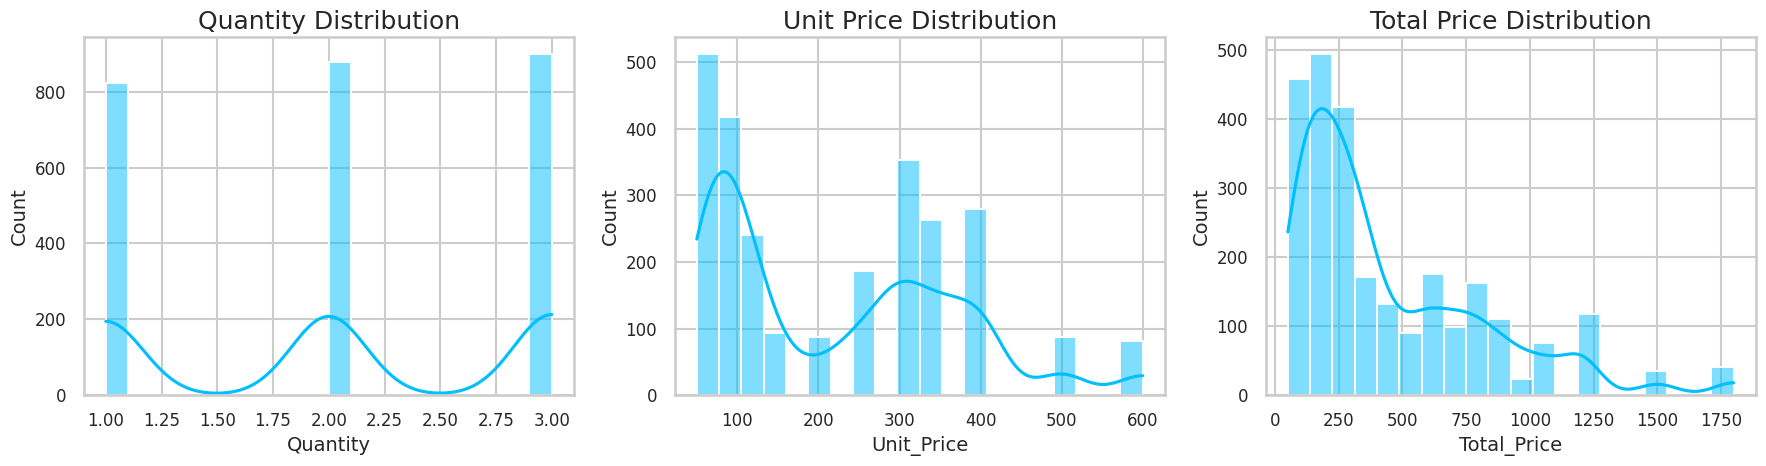

In [74]:
# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Quantity
sns.histplot(df['Quantity'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Quantity Distribution')

# Unit Price
sns.histplot(df['Unit_Price'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Unit Price Distribution')

# Total Price
sns.histplot(df['Total_Price'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Total Price Distribution')

plt.tight_layout()
plt.show()


##  Distribution Insights

### 1. Quantity Distribution

- Most quantities are **1, 2, or 3**.
- The distribution is **discrete** with clear peaks at whole numbers.
- This means most customers buy **a small number of items per transaction**.


### 2. Unit Price Distribution

- Prices are mostly between **50 and 150**.
- The distribution is **right-skewed** (long tail on the high side).
- A few products have **higher prices** (above 400).
- Indicates a product range that is mostly **low to mid price**, with some **high-end items**.


### 3. Total Price Distribution

- Most total values are below **500**.
- The curve shows **right skew**, meaning a few high-value transactions.
- Most customers spend **small to moderate amounts**.



## Useful Data Points

- Quantity values: Mostly **1 to 3**
- Common unit price range: **50–150**
- Total spend range (most frequent): **0–500**



## Notes

- Distributions are clean with **no missing or abnormal values**.
- Data is ready for the **next analysis step** (e.g., customer behavior, segmentation).


## Unique Value Counts
We also counted the number of unique values in key columns

In [75]:
df.columns

Index(['Invoice_ID', 'Customer_Name', 'Product', 'Brand', 'Quantity',
       'Unit_Price', 'Branch', 'Payment_Method', 'Total_Price', 'Day', 'Month',
       'Year'],
      dtype='object')

In [76]:
# Count unique values
unique_products = df['Product'].nunique()
unique_branches = df['Branch'].nunique()
unique_payments = df['Payment_Method'].nunique()

print("Unique Products:", unique_products)
print("Unique Branches:", unique_branches)
print("Unique Payment Methods:", unique_payments)

Unique Products: 10
Unique Branches: 4
Unique Payment Methods: 4


### Observation

- The business offers **10 types of products**, showing a **moderate product variety**.
- There are **4 branches**, which allows for **location-based analysis** (e.g. comparing performance).
- With **4 payment methods**, the business gives customers **flexibility in how they pay**, which could affect purchasing behavior.

No missing or duplicate values found in these key columns — the data is clean and ready for deeper analysis.

## 2.  Sales Over Time
**Goal:** Identify trends in sales across different time periods.

- Group data by month and calculate total sales.
- Line chart: Monthly Total Sales
- Line chart: Monthly Number of Transactions
- Optional: Monthly sales trend for each branch


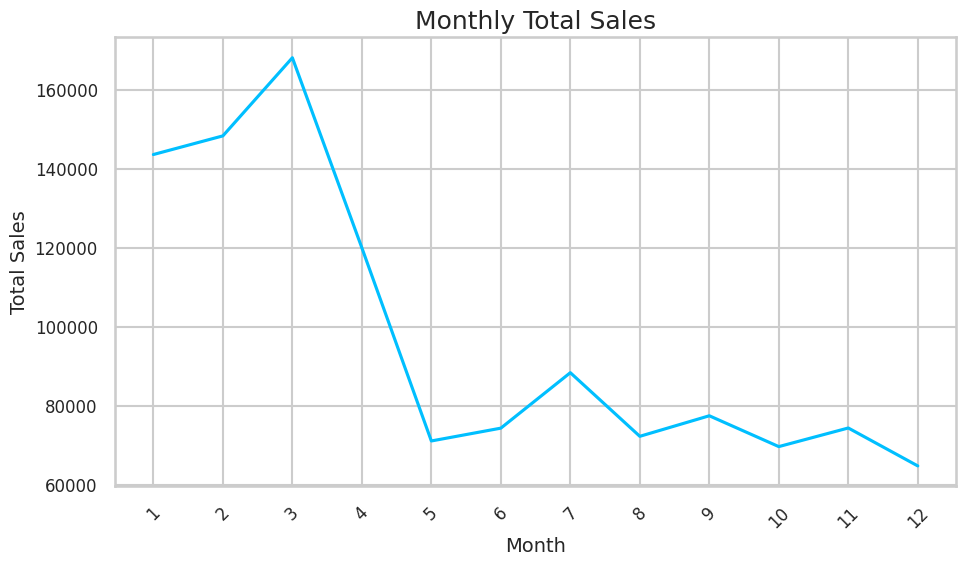

In [77]:
# Calculate total sales per month
monthly_sales = df.groupby('Month')['Total_Price'].sum()

# Calculate number of transactions per month (unique Invoice_IDs)
monthly_transactions = df.groupby('Month')['Invoice_ID'].nunique()

# Optional: Monthly sales trend per branch
branch_sales_trend = df.groupby(['Month', 'Branch'])['Total_Price'].sum().unstack()

# Plotting the line charts

# 1. Monthly Total Sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, label='Total Sales')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##  Monthly Sales Summary

- **March** had the highest sales (~170,000) — likely due to promotions or seasonal demand.
- **April & May** saw a sharp drop in sales — possible issues with stock or customer demand.
- **June to December** sales were **low but stable** (65K–90K).

##  Recommendations

- Repeat successful **March promotions** in other months.
- Investigate **reasons for the April–May drop** and resolve them.
- Boost sales with **offers during weak months** (e.g., May, October).

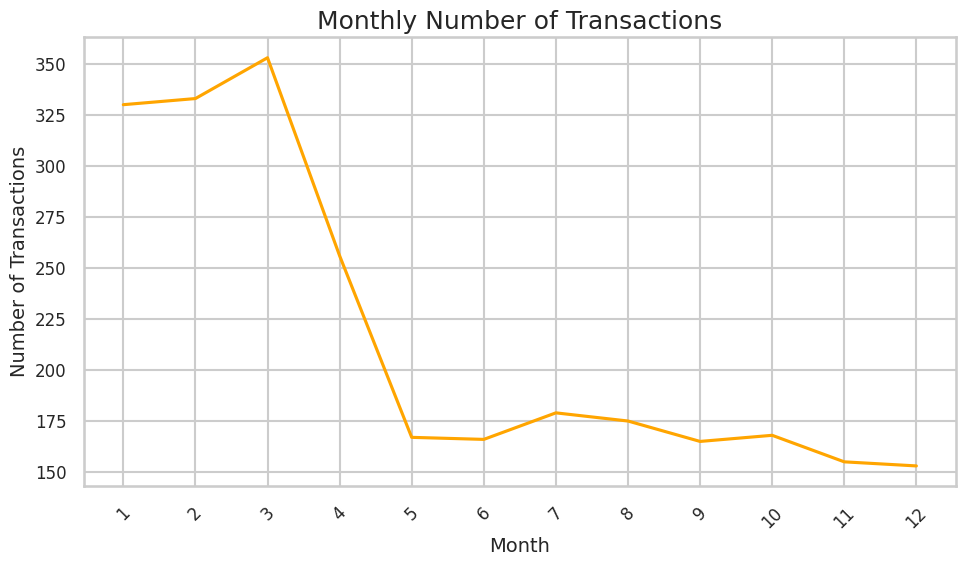

In [78]:
# 2. Monthly Number of Transactions
plt.figure(figsize=(10, 6))
plt.plot(monthly_transactions.index.astype(str), monthly_transactions.values, label='Number of Transactions', color='orange')
plt.title('Monthly Number of Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##  Monthly Transactions Summary

- **March** had the highest number of transactions (~355).
- **Big drop in April and May** — transactions fell to around 165.
- **June to December** stayed **low and steady** (150–180).

##  Recommendations

- Study **what worked in March** (ads, events, etc.).
- Try to **increase customer visits** during low months.
- Combine **offers with marketing** to raise transactions again.

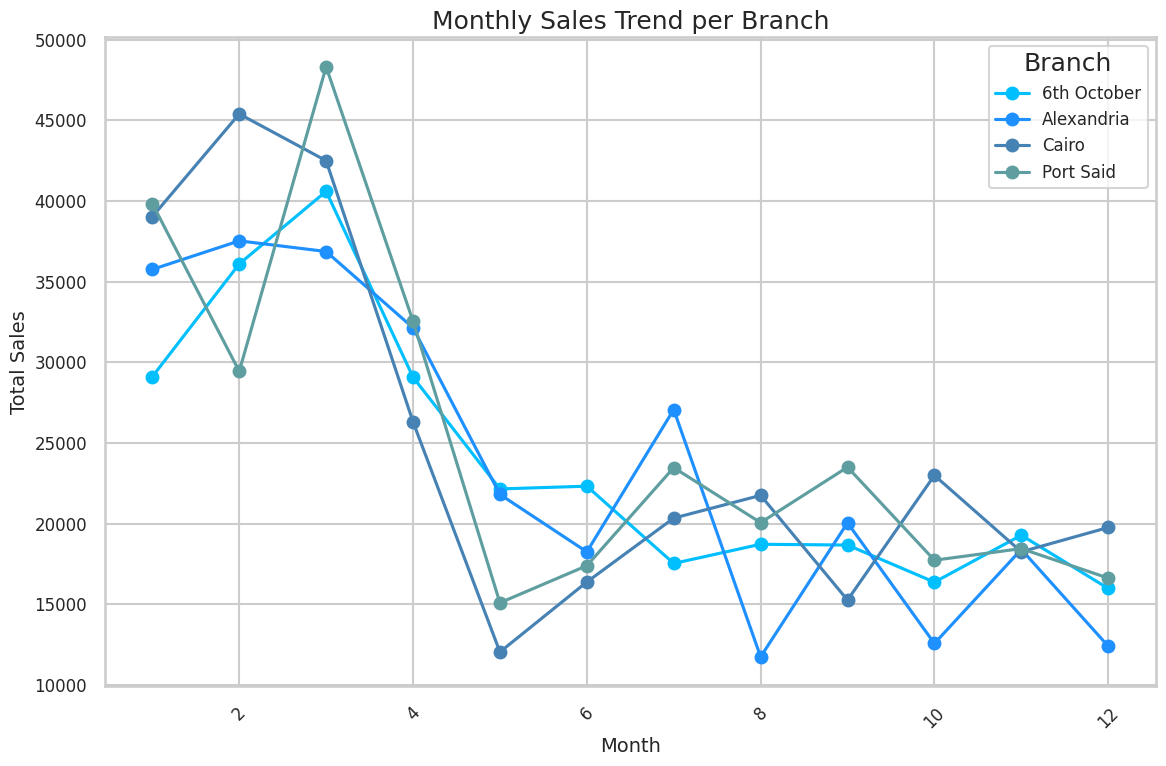

In [79]:
# 3. Optional: Monthly Sales Trend per Branch
branch_sales_trend.plot(figsize=(12, 8), title="Monthly Sales Trend per Branch", marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##  Branch Sales Trend Summary

- **All branches** had highest sales in **March**.
- After March, sales dropped clearly in **all branches**.
- From **June to December**, sales were **lower and unstable**, with small ups and downs.

###  Branch Highlights

- **Port Said** had the **highest peak** in March (~49,000).
- **Cairo** and **6th October** had good sales early, but dropped fast.
- **Alexandria** showed some recovery in mid-year (July–September).

##  Recommendations

- Focus on **March strategies** to repeat success.
- Support weaker branches with **local promotions**.
- Try to keep sales stable by **analyzing top-performing months** in each branch.


###Compare sales behavior across different branches by analyzing:
- Total price
- Quantity sold
- Unit price

In [80]:
# Average total price per branch
df.groupby('Branch')['Total_Price'].mean().sort_values(ascending=False)

,Total_Price
Branch,
Alexandria,471.18
Port Said,452.78
Cairo,447.78
6th October,434.51


In [81]:
# Average quantity per branch
df.groupby('Branch')['Quantity'].mean().sort_values(ascending=False)


,Quantity
Branch,
Alexandria,2.04
Port Said,2.03
Cairo,2.02
6th October,2.02


In [82]:

# Average unit price per branch
df.groupby('Branch')['Unit_Price'].mean().sort_values(ascending=False)

,Unit_Price
Branch,
Alexandria,231.72
Port Said,220.94
Cairo,220.34
6th October,217.08


##  Branch-Level Sales Insights

###  Observations Based on Quantity and Unit Price:

-  **Quantity**:
  - All branches have a **very similar average quantity** per transaction, ranging from **2.02 to 2.04 units**.
  - This suggests **consistent buying behavior** across locations in terms of volume.

-  **Unit Price**:
  - **Alexandria** has the **highest average unit price** at **231.72**, slightly higher than the others.
  - **6th October** branch has the **lowest average unit price** at **217.08**.
  - This may indicate **different product mixes or pricing strategies** across branches.

###  Insights:
- While purchase volume is stable across branches, **pricing differences suggest that Alexandria might be selling more premium or expensive products**.
- Further analysis could confirm if product type or brand availability differs by branch.

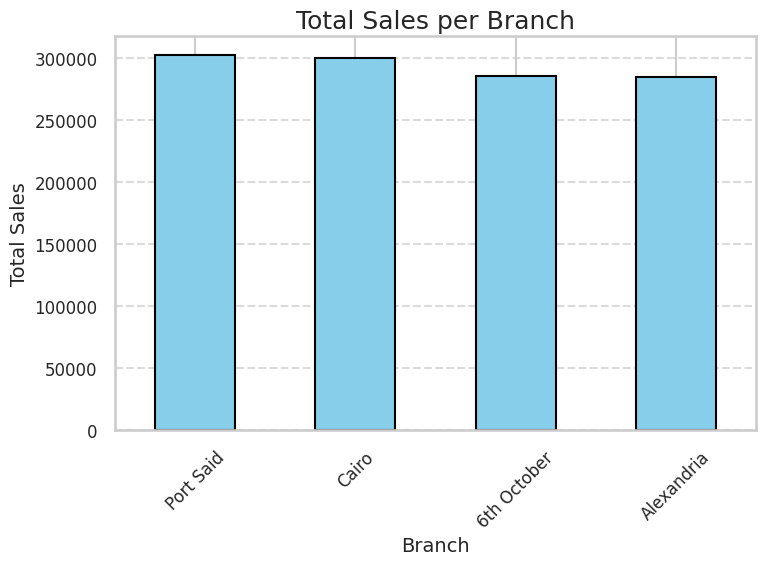

In [83]:
branch_sales = df.groupby("Branch")["Total_Price"].sum().sort_values(ascending=False)

#Bar Chart
plt.figure(figsize=(8, 6))
branch_sales.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Total Sales per Branch")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


port said is bigest branche

## 4.  Product & Brand Insights
**Goal:** Identify best-selling products and top revenue-generating brands.

- Top 10 Products by:
  - Quantity sold
  - Total sales
- Top Brands by revenue
- Bar chart: Top 10 Products
- Bar chart: Top Brands


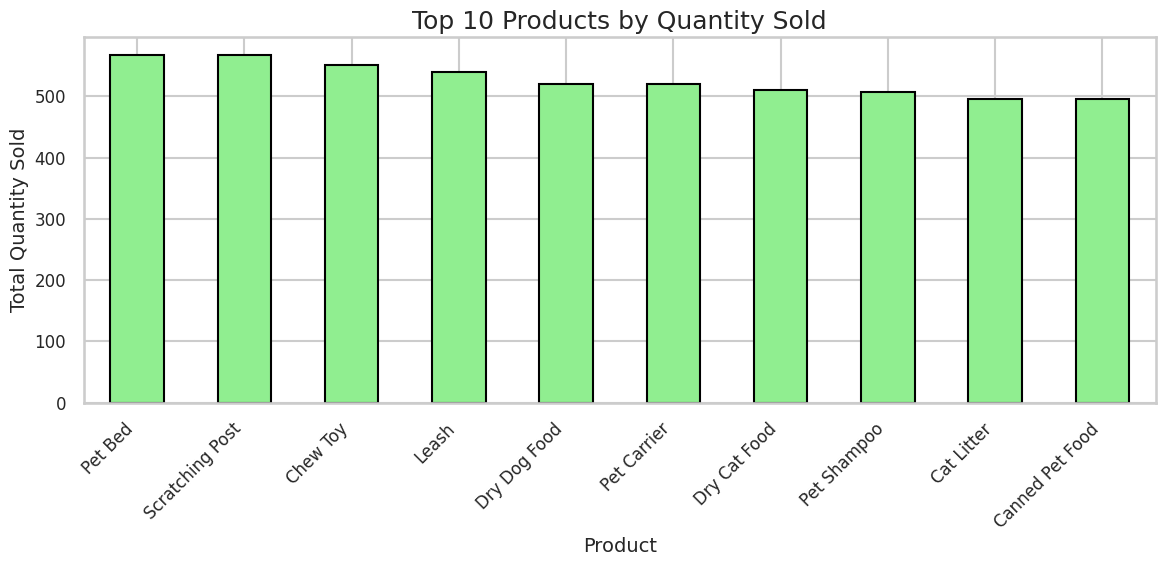

In [84]:
top_products_qty = df.groupby("Product")["Quantity"].sum().sort_values(ascending=False).head(10)


top_products_qty.plot(kind="bar", color="lightgreen", edgecolor='black')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


###  Top 10 Products by Quantity Sold

- **Pet Bed** and **Scratching Post** are the best-selling products by quantity.
- All top 10 products have similar quantities sold, ranging around 490–570 units.
- The top products include a mix of **pet accessories** and **pet food items**.
- This suggests a balanced demand between pet care products and food.


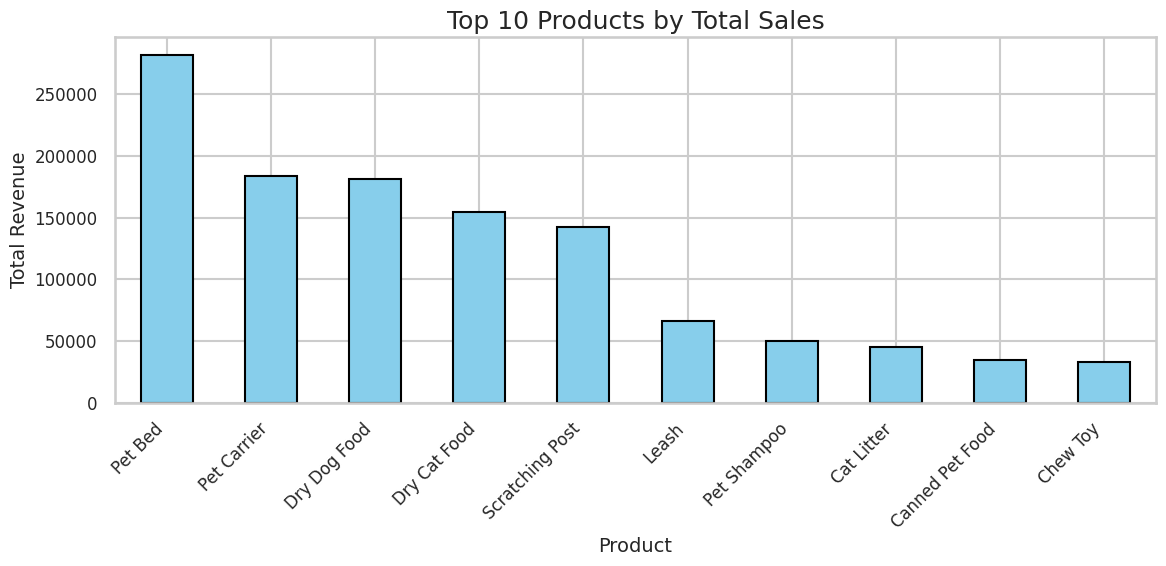

In [85]:
### 2.  Top 10 Products by Total Sales
top_products_sales = df.groupby("Product")["Total_Price"].sum().sort_values(ascending=False).head(10)


top_products_sales.plot(kind="bar", color="skyblue", edgecolor='black')
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

###  Top 10 Products by Total Sales

- **Pet Bed** generated the highest revenue by a large margin.
- **Pet Carrier**, **Dry Dog Food**, and **Dry Cat Food** also contributed significantly to total sales.
- Despite high quantities, some products like **Chew Toy** and **Leash** have lower revenue, suggesting lower unit prices.
- High-value items (e.g., Pet Bed, Pet Carrier) play a major role in revenue.


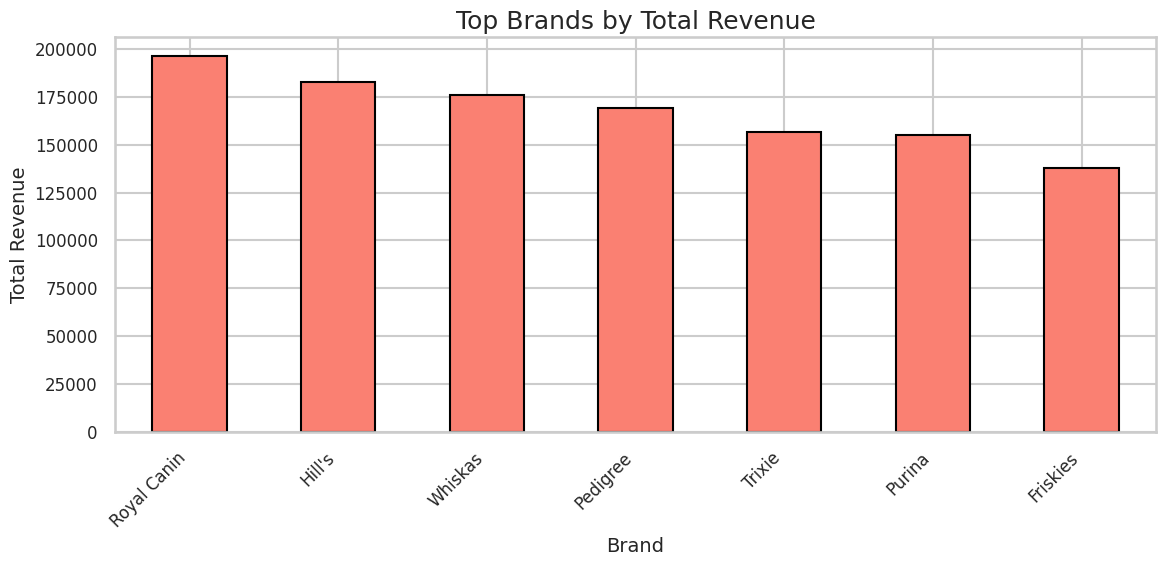

In [86]:
### 3.  Top Brands by Revenue
top_brands_sales = df.groupby("Brand")["Total_Price"].sum().sort_values(ascending=False).head(10)


top_brands_sales.plot(kind="bar", color="salmon", edgecolor='black')
plt.title("Top Brands by Total Revenue")
plt.xlabel("Brand")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Top Brands by Total Revenue

- **Royal Canin** is the leading brand in terms of revenue, followed by **Hill's** and **Whiskas**.
- All top brands have total revenue above 130,000, showing strong performance.
- The top brands are mainly focused on **pet food and nutrition**, indicating it's a high-revenue category.
- **Friskies** has the lowest revenue among the top brands but still shows solid sales.


#  Summary – Product & Brand Analysis

- **Pet Bed** is the top-selling product.
- Food and care items are very popular.
- Expensive products (like **Pet Carrier**) make more money even if sold less.
- **Royal Canin** is the top brand by revenue, then **Hill’s** and **Whiskas**.
- Food brands bring the most money.
- Cheap items sell a lot but give less profit.

# 5. Payment Method Analysis
Goal: Understand customer payment preferences.

Count of sales by payment method
Total revenue per payment method
Bar chart: Payment Method Usage
Optional: Payment trends by branch or over time

In [87]:
# 1. Count of sales by payment method
payment_counts = df['Payment_Method'].value_counts()
print("Sales Count by Payment Method:\n", payment_counts)

Sales Count by Payment Method:
 Payment_Method
Mobile Wallet    1117
Cash              502
Visa              491
Installments      490
Name: count, dtype: int64


In [88]:
# 2. Total revenue per payment method
revenue_by_payment = df.groupby('Payment_Method')['Total_Price'].sum()
print("\nTotal Revenue by Payment Method:\n", revenue_by_payment)



Total Revenue by Payment Method:
 Payment_Method
Cash             223280
Installments     222840
Mobile Wallet    507340
Visa             219510
Name: Total_Price, dtype: int64


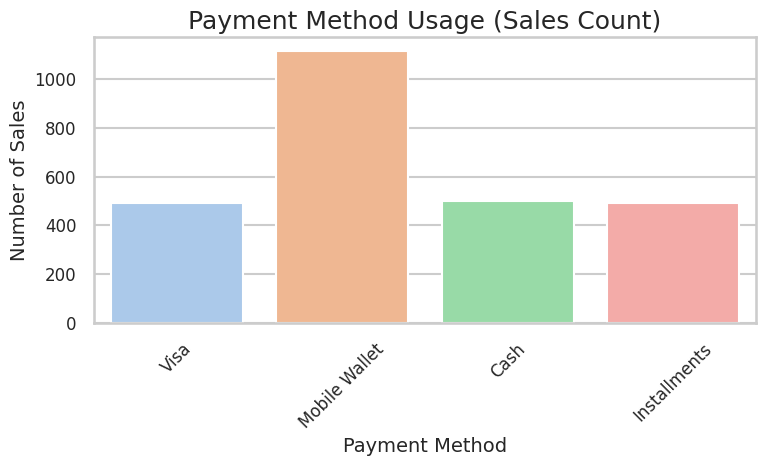

In [89]:
# 3. Bar chart: Payment Method Usage
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Payment_Method', palette='pastel')
plt.title("Payment Method Usage (Sales Count)")
plt.ylabel("Number of Sales")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights from the Chart:

- **Mobile Wallet** is the most preferred payment method with the highest number of sales.
- **Visa**, **Cash**, and **Installments** have nearly equal usage, with a lower number of sales compared to Mobile Wallet.
- Customers show a strong trend toward digital payments over traditional methods.

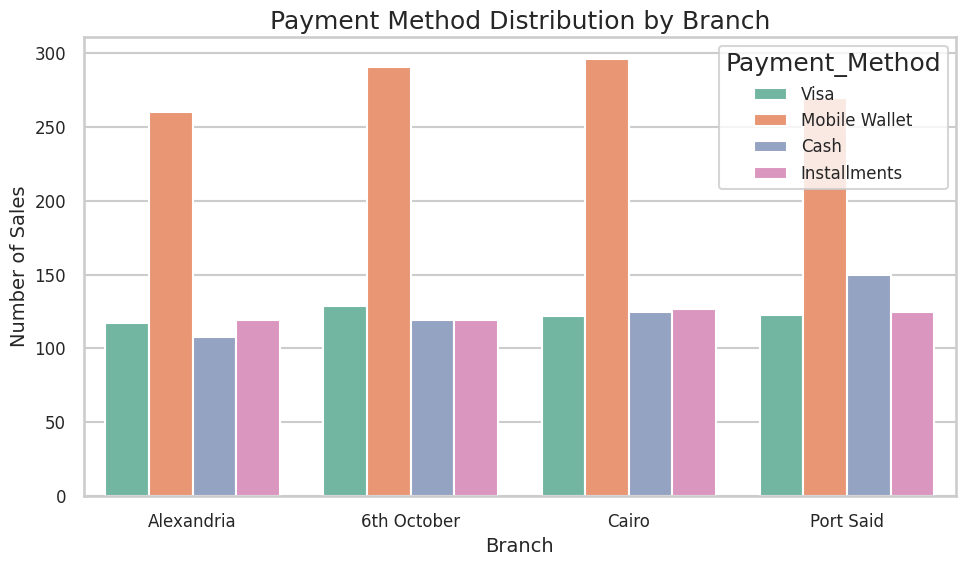

In [90]:
# Optional: Payment method usage by branch
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Branch', hue='Payment_Method', palette='Set2')
plt.title("Payment Method Distribution by Branch")
plt.xlabel("Branch")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()

### Insights from the Chart:

- **Mobile Wallet** is the most used payment method across all branches.
- **Visa**, **Cash**, and **Installments** have similar usage in most branches.
- **Port Said** branch has the highest use of **Cash** compared to other branches.
- **Cairo** branch shows a more balanced use of all payment methods.
- **6th October** and **Cairo** branches have the highest number of Mobile Wallet users.

### Business Value:

- Focus marketing and promotions on **Mobile Wallet** to match customer preferences.
- Consider offering incentives for alternative methods (e.g. Visa or Installments) in branches where usage is low.
- Analyze why **Cash** is higher in Port Said — may suggest customer preference or limited access to digital payment.

### Key Findings:

- **Mobile Wallet** is the most used payment method with **1,117 sales** and the highest total revenue (**507,340**).
- **Cash**, **Visa**, and **Installments** are nearly equal in usage (~490–502 sales).
- **Cash** and **Installments** generate similar revenues (**223,280** and **222,840** respectively).
- **Visa** has the lowest revenue (**219,510**) among all methods.

### Branch-Level Insights:

- **Mobile Wallet** leads in every branch, especially in **Cairo** and **6th October**.
- **Port Said** has the highest usage of **Cash**.
- **Cairo** shows a balanced use of all payment methods.

### Business Recommendations:

- Focus on promoting **Mobile Wallet** offers and support.
- Investigate reasons behind higher **Cash** use in **Port Said**.
- Encourage use of **Visa** through targeted incentives to boost revenue.